In [29]:
!pip install --upgrade pandas numpy scikit-learn nltk tensorflow lightgbm seaborn
!pip install --upgrade machine-learning-datasets
!pip install --upgrade shap lime
!pip install matplotlib==3.1.3

     |████████████████████████████████| 15.7 MB 4.1 MB/s 
     |████████████████████████████████| 24.8 MB 65.0 MB/s 
     |████████████████████████████████| 497.5 MB 29 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.4.4
    Uninstalling tensorflow-2.4.4:
      Successfully uninstalled tensorflow-2.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
machine-learning-datasets 0.1.16.4 requires matplotlib<4.0.0,>=3.2.2, but you have matplotlib 3.1.3 which is incompatible.
machine-lea

  Using cached scikit_learn-0.22.2.post1-cp37-cp37m-manylinux1_x86_64.whl (7.1 MB)
     |████████████████████████████████| 11.2 MB 4.3 MB/s 
  Using cached tensorflow-2.4.4-cp37-cp37m-manylinux2010_x86_64.whl (394.5 MB)
     |████████████████████████████████| 899 kB 43.4 MB/s 
  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
      Successfully uninstalled tensorflow-2.8.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scik

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.22.2.post1 which is incompatible.
machine-learning-datasets 0.1.16.4 requires matplotlib<4.0.0,>=3.2.2, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [30]:
import math
import machine_learning_datasets as mldatasets
import pandas as pd
import numpy as np
import re
import nltk
from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import lime
import lime.lime_tabular
from lime.lime_text import LimeTextExplainer

In [31]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
# Loading the data
chocolateratings_df = mldatasets.load("chocolate-bar-ratings")
chocolateratings_df

https://github.com/PacktPublishing/Interpretable-Machine-Learning-with-Python/raw/master/datasets/chocolate-ratings.zip downloaded to /content/data/chocolate-ratings.zip
/content/data/chocolate-ratings.zip uncompressed to /content/data/chocolate-ratings
1 dataset files found in /content/data/chocolate-ratings folder
parsing /content/data/chocolate-ratings/chocolate.csv


,company,company_location,review_date,country_of_bean_origin,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,5150,U.S.A,2019,Madagascar,76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,5150,U.S.A,2019,Dominican republic,76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,5150,U.S.A,2019,Tanzania,76.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,A. Morin,France,2012,Peru,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,A. Morin,France,2012,Bolivia,70.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,Zotter,Austria,2014,Blend,80.0,2.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,waxy,cloying,vegetal,NaN
2220,Zotter,Austria,2017,Colombia,75.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,strong nutty,marshmallow,NaN,NaN
2221,Zotter,Austria,2018,Belize,72.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muted,roasty,accessible,NaN
2222,Zotter,Austria,2018,Congo,70.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fatty,mild nuts,mild fruit,NaN


In [33]:
# Set aside the text features for using them on the NLP model later.
tastes_df = chocolateratings_df[['first_taste', 'second_taste', 'third_taste', 'fourth_taste']]
chocolateratings_df = chocolateratings_df.drop(['first_taste', 'second_taste', 'third_taste', 'fourth_taste'], axis=1)
tastes_df.head(90).tail(10)

,first_taste,second_taste,third_taste,fourth_taste
80,oily,vegetal,nutty,cocoa
81,oily,vanilla,melon,cocoa
82,rich,sour,mild smoke,NaN
83,fruity,sour,NaN,NaN
84,high roast,high astringnet,NaN,NaN
85,smokey,savory,NaN,NaN
86,sandy,roasty,nutty,NaN
87,roasty,brownie,nutty,NaN
88,red wine,rich cocoa,long,NaN
89,creamy,fruit,cocoa,NaN


In [34]:
#Change to 'Other' category if the number of items are fewer than 3.3333%
chocolateratings_df = mldatasets.make_dummies_with_limits(chocolateratings_df, 'company_location', 0.03333)
chocolateratings_df = mldatasets.make_dummies_with_limits(chocolateratings_df, 'country_of_bean_origin', 0.03333)

In [35]:
chocolateratings_df = chocolateratings_df.drop(['beans'], axis=1)
binary_features = ['cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar', 'sweetener_without_sugar']
chocolateratings_df[binary_features] = chocolateratings_df[binary_features].apply(lambda x: np.where(x.str.contains('_not_'), 0, 1))

In [36]:
stop = stopwords.words('english')

In [37]:
trans_dict = {'?':'', '&':'', 'overly intense':'intensest',\
              'overly sweet':'sweetest', 'overly tart':'tartest',\
              'sl. bitter':'bitterness', 'sl. burnt':'burntness',\
              'sl. sweet':'sweetness', 'sl. dry':'dryness',\
              'sl. chalky':'chalkiness', 'sl. Burnt':'burntness',\
              'hints fruit':'fruitiness', 'hint fruit':'fruitiness',\
              'high acid':'acidic', 'high acidity':'acidic',\
              'moderate acidity':'acid', 'high roast':'roast',\
              'astringcy':'astringent', 'astringnet':'astringent',\
              'full body':'robust', 'astringency':'astringent',\
              'high astringent':'acidic', 'rich cocoa':'rich',\
              'mild bitter':'bitterish', 'fruit long':'fruit',\
              'base cocoa':'basic', 'basic cocoa':'basic', '-like':'',\
              'smomkey':'smokey', 'true':'real', '(n)':'', '/':' ',\
              '-':' ', ' +':' ' }
trans_regex = re.compile("|".join(map(re.escape, trans_dict.keys( ))))

In [38]:
tastes_s = tastes_df.replace(np.nan, '', regex=True).\
            agg(' '.join, axis=1).str.strip().str.lower().\
            apply(lambda s: trans_regex.sub(lambda match:\
                                trans_dict[match.group(0)], s)).\
            apply(lambda s: ' '.join([word for word in s.split()\
                                      if word not in (stop)]))

In [39]:
print(tastes_s)

0          cocoa blackberry robust
1             cocoa vegetal savory
2                rich fatty bready
3              fruity melon roasty
4                    vegetal nutty
                   ...            
2219          waxy cloying vegetal
2220      strong nutty marshmallow
2221       muted roasty accessible
2222    fatty mild nuts mild fruit
2223            fatty earthy cocoa
Length: 2224, dtype: object


In [40]:
tastewords_fdist = FreqDist(word for word in word_tokenize(tastes_s.str.cat(sep=' ')))
tastewords_df = pd.DataFrame.from_dict(tastewords_fdist, orient='index').rename(columns={0:'freq'})
commontastes_l = tastewords_df[tastewords_df.freq > 74].index.to_list()
print(commontastes_l)

['cocoa', 'rich', 'fatty', 'roasty', 'nutty', 'sweet', 'sandy', 'sour', 'intense', 'mild', 'fruit', 'sticky', 'earthy', 'spice', 'molasses', 'floral', 'spicy', 'woody', 'coffee', 'berry', 'vanilla', 'creamy']


In [41]:
chocolateratings_df['tastes'] = tastes_s         

In [42]:
chocolateratings_df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   company                                    2224 non-null   object 
 1   review_date                                2224 non-null   int64  
 2   cocoa_percent                              2224 non-null   float64
 3   rating                                     2224 non-null   float64
 4   counts_of_ingredients                      2224 non-null   int64  
 5   cocoa_butter                               2224 non-null   int64  
 6   vanilla                                    2224 non-null   int64  
 7   lecithin                                   2224 non-null   int64  
 8   salt                                       2224 non-null   int64  
 9   sugar                                      2224 non-null   int64  
 10  sweetener_without_sugar 

In [43]:
chocolateratings_df = mldatasets.make_dummies_from_dict(chocolateratings_df,\
                                             'tastes', commontastes_l)
chocolateratings_df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   company                                    2224 non-null   object 
 1   review_date                                2224 non-null   int64  
 2   cocoa_percent                              2224 non-null   float64
 3   rating                                     2224 non-null   float64
 4   counts_of_ingredients                      2224 non-null   int64  
 5   cocoa_butter                               2224 non-null   int64  
 6   vanilla                                    2224 non-null   int64  
 7   lecithin                                   2224 non-null   int64  
 8   salt                                       2224 non-null   int64  
 9   sugar                                      2224 non-null   int64  
 10  sweetener_without_sugar 

In [44]:
rand = 9
y = chocolateratings_df['rating'].\
                            apply(lambda x: 1 if x >= 3.5 else 0)
X = chocolateratings_df.drop(['rating','company'], axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                test_size=0.33, random_state=rand)

In [45]:
X_train_nlp = tastes_s[X_train.index]
X_test_nlp = tastes_s[X_test.index]

# **Local interpretation for a single prediction at a time using LimeTabularExplainer**

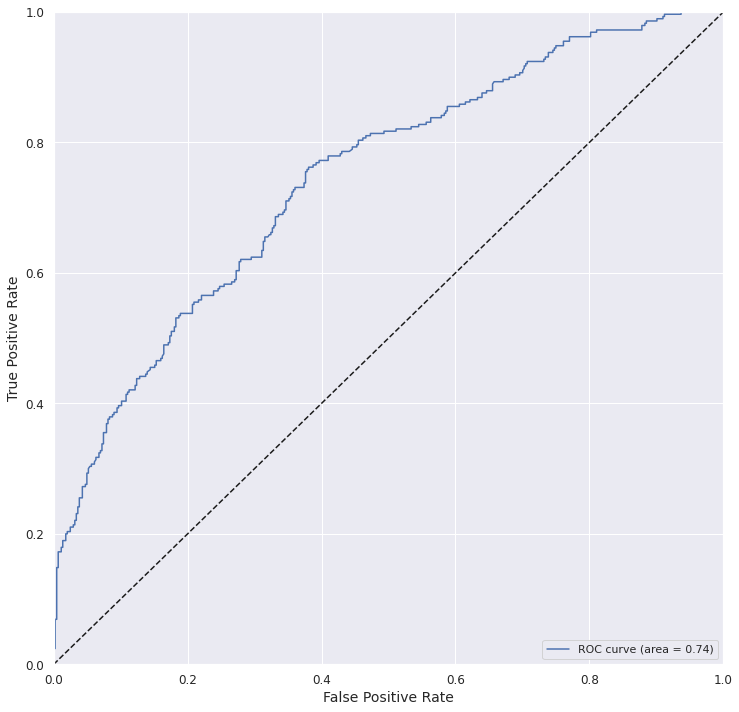

Accuracy_train:  0.7315		Accuracy_test:   0.6975
Precision_test:  0.6771		Recall_test:     0.4483
ROC-AUC_test:    0.7450		F1_test:         0.5394		MCC_test: 0.3433


In [46]:
orig_plt_params = plt.rcParams
sns.set()
svm_mdl = svm.SVC(probability=True, gamma='auto', random_state=rand)
fitted_svm_mdl = svm_mdl.fit(X_train, y_train)
y_train_svc_pred, y_test_svc_prob, y_test_svc_pred =\
        mldatasets.evaluate_class_mdl(fitted_svm_mdl, X_train,\
                                      X_test, y_train, y_test)

In [47]:
np.random.seed(rand)
X_train_summary = shap.kmeans(X_train, 10)
shap_svm_explainer = shap.KernelExplainer(fitted_svm_mdl.predict_proba, X_train_summary)
shap_svm_values_test = shap_svm_explainer.shap_values(X_test, nsamples=200, l1_reg="num_features(20)")

  0%|          | 0/734 [00:00<?, ?it/s]

In [48]:
print(shap_svm_explainer.expected_value)
print(np.asarray(shap_svm_values_test).shape)

[0.63011796 0.36988204]
(2, 734, 44)


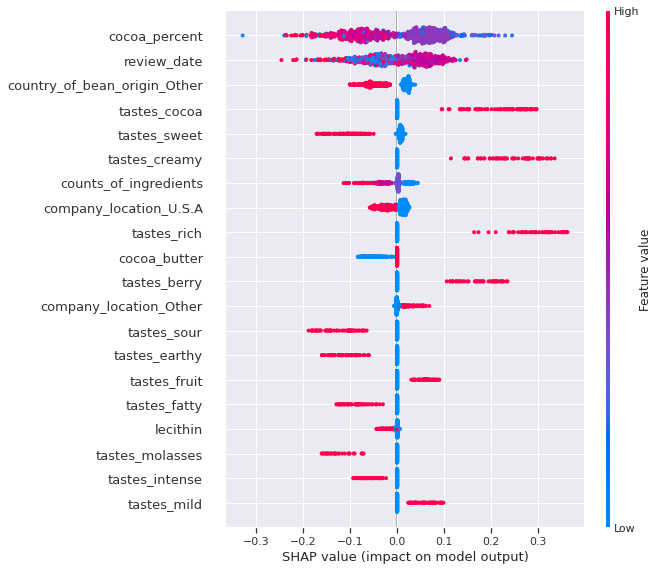

In [49]:
shap.summary_plot(shap_svm_values_test[1], X_test, plot_type="dot")

In [50]:
sample_test_idx = X_test.index.\
                    get_indexer_for([5,6,7,18,19,21,24,25,27])

In [51]:
expected_value = shap_svm_explainer.expected_value[1]
y_test_shap_pred = (shap_svm_values_test[1].sum(1) + expected_value) > 0.5
print(np.array_equal(y_test_shap_pred, y_test_svc_pred))

True


In [52]:
FN = (~y_test_shap_pred[sample_test_idx]) & (y_test.iloc[sample_test_idx] == 1).to_numpy() 

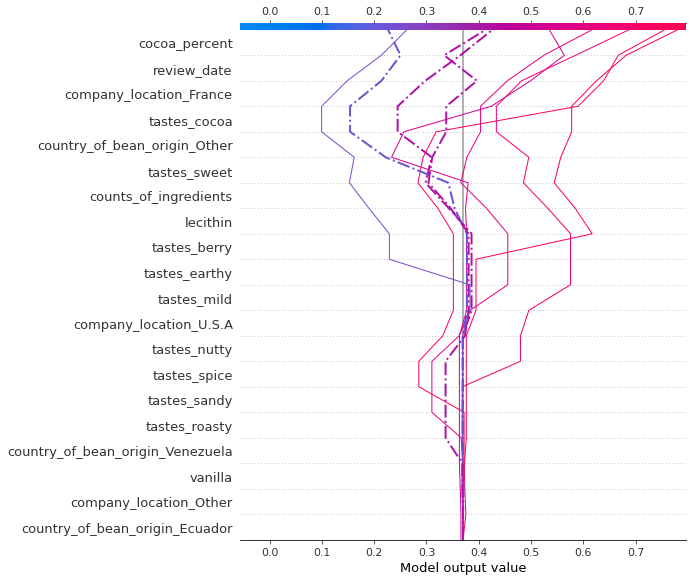

In [53]:
sns.reset_orig()
plt.rcParams.update(orig_plt_params)
shap.decision_plot(expected_value, shap_svm_values_test[1][sample_test_idx],\
                   X_test.iloc[sample_test_idx], highlight=FN)

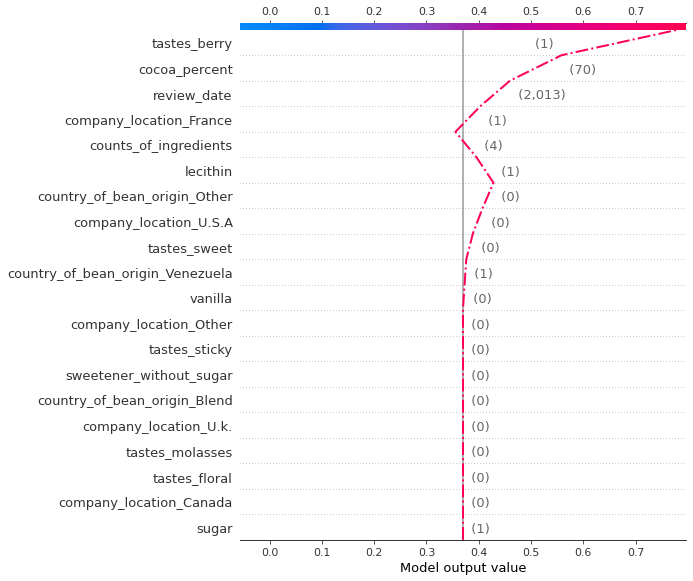

In [54]:
shap.decision_plot(expected_value, shap_svm_values_test[1][696],\
                   X_test.iloc[696], highlight=0)

In [55]:
eval_idxs = (X_test.index==5) | (X_test.index==24)
X_test_eval = X_test[eval_idxs]
eval_compare_df = pd.concat([\
            chocolateratings_df.iloc[X_test[eval_idxs].index].rating,\
            pd.DataFrame({'y':y_test[eval_idxs]}, index=[5,24]),\
            pd.DataFrame({'y_pred':y_test_svc_pred[eval_idxs]},\
                         index=[24,5]),
            X_test_eval], axis=1).transpose()
eval_compare_df

,5,24
rating,4.0,2.75
y,1.0,0.00
y_pred,1.0,0.00
review_date,2013.0,2015.00
cocoa_percent,70.0,70.00
counts_of_ingredients,4.0,4.00
cocoa_butter,1.0,1.00
vanilla,0.0,0.00
lecithin,1.0,1.00
salt,0.0,0.00


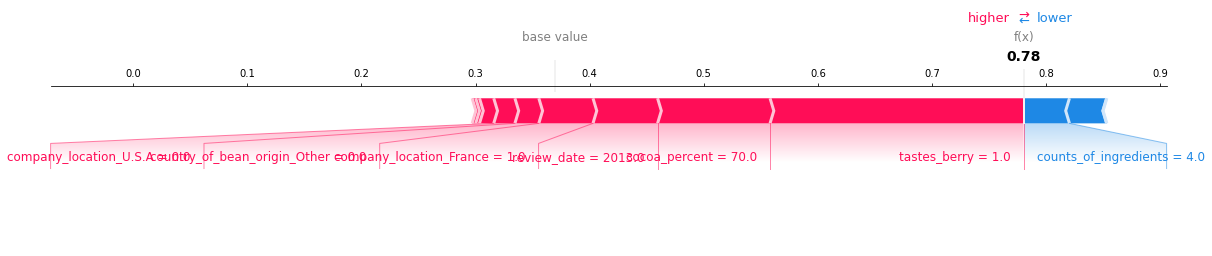

In [56]:
shap.force_plot(expected_value, shap_svm_values_test[1][X_test.index==5],\
                X_test[X_test.index==5],  matplotlib=True)